In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
  

C:\Users\rawll\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rawll\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rawll\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rawll\.conda\envs\tensorflow\lib\site-packages\tensorflow\

In [2]:
# from nltk import word_tokenize 
# stop_words = set(stopwords.words('english'))
# def listtosen(l):
#     new = ""
#     for x in l:
#         new+=x
#         new+=' '
#     return new
# def rem_stopwords(s):
    
#     word_tokens = word_tokenize(s) 
  
#     filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
#     filtered_sentence = [] 
  
#     for w in word_tokens: 
#         if w not in stop_words: 
#             filtered_sentence.append(w) 
        
#     sen = listtosen(filtered_sentence)
#     return sen

# x = rem_stopwords("This is new")
# print(x)

    

In [3]:
df = pd.read_csv('reviews.csv')
df.isnull().values.any() # checks if data file have any null values
df.head()

,reviews,sentiment
0,"Well, you'd better if you plan on sitting thro...",0
1,Moonwalker is a Fantasy Music film staring Mic...,1
2,I bought this video on a throw-out table at th...,0
3,Since the last horrid Astérix film and the fac...,1
4,"I grew up with the Abbott and Costello movies,...",1


In [4]:
def preprocess(text):
  text = re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
  text = re.sub('[\W]+', ' ', text.lower()) +\
      ' '.join(emoticons).replace('-', '')
  return text


In [5]:
from nltk import word_tokenize 
X = []
sentences = list(df['reviews'])
for sen in sentences:
    X.append(preprocess(sen))
    #X.append(rem_stopwords(f))
y = df['sentiment']

# Train( 80 ) Test( 20 ) Split

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train[3])

just before dawn is an underrated horror film from the early eighties i haven t seen it in years but it had a great impact when i watched it quite original for its day the only problem is that it has not been released on video or dvd for years if you like horror i urge you to check this little gem out 


# Embedding Layer ( For converting textual data into numeric data )

* First layer in DL model in Keras

In [7]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(len(X_train[1]))
print(len(X_test[1]))

194
108


In [8]:
print(X_train[2])

[3957, 156, 610, 366, 2349, 22, 1, 1254, 492, 864, 234, 219, 298, 22, 1, 271, 657, 1685, 147, 3, 369, 4, 19, 1489, 27, 870, 5, 1328, 1, 19, 474, 1, 193, 11, 39, 12, 3, 11, 1, 19, 6, 71, 32, 151, 44, 5, 167, 43, 11, 48, 25, 145, 51, 1989, 13, 605, 175, 649, 463, 5, 181, 5, 2048, 8, 22, 91, 1016, 59, 2856, 1, 1140, 61, 508, 46, 75, 221, 5, 327, 3, 1254, 19, 735, 3, 1254, 19, 13, 31, 1, 56, 2364, 588, 2, 213, 10, 15, 13, 605, 205, 160, 2599, 470, 601, 2, 1989, 336, 71, 23, 8, 1, 180, 18, 8, 2856, 36, 7, 438, 38, 1, 88, 15, 17, 10, 1140, 51, 2599, 233, 13, 605, 89, 4, 180, 67, 30, 1539, 2058, 1172, 4, 1, 1140, 2, 234, 1, 15, 293, 21, 59, 49, 1, 15, 147, 601, 6, 23, 1, 116, 1254, 492, 123, 2, 915, 126, 7, 352, 5, 29, 7, 662, 11, 7, 12, 3, 1580, 122, 2, 32, 59, 176, 3, 241, 35, 287, 38, 3, 2228, 318, 4, 3732, 8, 1, 1227, 212, 18, 300, 4, 263, 5, 719, 48, 171, 2, 213, 1253, 5, 1, 65, 32, 137, 870, 5, 1580, 122, 48, 1712, 1254, 1468, 38, 2049, 22, 900, 14, 71, 2, 1242, 191, 10, 163, 498, 1, 47

In [9]:
# padding process 
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [10]:
print(len(X_train[1]))
print(len(X_test[1]))

100
100


In [11]:
print(vocab_size) # number of unique words in dataset

94562


In [12]:
# using GloVe for creating feature matrix
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [13]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [14]:
len(embedding_matrix)

94562

# Text Classification with Recurrent Neural Network (LSTM)

In [15]:
from keras.layers import LSTM
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          28368600  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               801600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 401       
Total params: 29,170,601
Trainable params: 29,170,601
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, y_train, batch_size=128, epochs=7,verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)


Train on 32000 samples, validate on 8000 samples
Epoch 1/7


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(128, 300), b.shape=(300, 800), m=128, n=800, k=300
	 [[{{node bidirectional_1/while/MatMul}}]]
	 [[metrics/acc/Identity/_141]]
  (1) Internal: Blas GEMM launch failed : a.shape=(128, 300), b.shape=(300, 800), m=128, n=800, k=300
	 [[{{node bidirectional_1/while/MatMul}}]]
0 successful operations.
0 derived errors ignored.

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
val_acc = history.history['acc'][4]

In [20]:

# model.save('path_to_my_model.h5')

# # Recreate the exact same model purely from the file
# new_model = keras.models.load_model('path_to_my_model.h5')

In [21]:
predictions = model.predict(X_test)

In [22]:
new_predictions = new_model.predict(X_test)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)


NameError: name 'new_model' is not defined

In [9]:
print(new_predictions)
print(X_train[2])

NameError: name 'new_predictions' is not defined

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()



<Figure size 640x480 with 1 Axes>

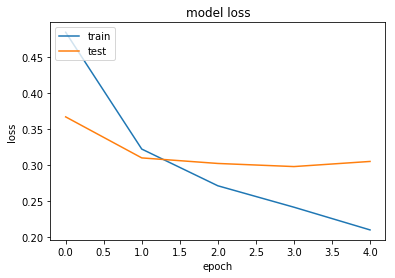

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [20]:
n=24436
instance = X[n]
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]
#print(flat_list)

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)
print(instance)

[[  21    9 1000    3 1354 1969 1881  706 1902 1354  909  227 1278  909
    21  706 1394  909   12 1505  706 1881  227   21  706 2006    9   12
  1000  706 1881   21    9   12  139    3   12   21  909 1394 4205    3
    12 4205  706 1131  227  706   21  706 1394  909   12 1505  706 1881
   227   21  706    3 1354  909   12   12  909 1394  227    9 1394  909
  1000   21  706 1394   12    9 1881 1000  706  139 1505  909   21  909
  1881 1000  909    9   21   12    3 1278 1394  909    3   21 1902  706
  1394 1969]]


In [ ]:
print(instance)
model.predict_proba(instance)

In [ ]:
model.predict_classes(instance)

In [ ]:
print(y[n])

In [ ]:
df.sample()

In [22]:
len(instance[0])

100